In [ ]:
#Imports
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
import numpy as np
from pandas.api.types import is_string_dtype
import os
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
%matplotlib inline

from IPython.core.pylabtools import figsize
from sklearn.preprocessing import StandardScaler,Normalizer,FunctionTransformer,QuantileTransformer,PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,HuberRegressor,Lasso,BayesianRidge,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import warnings
from sklearn.svm import SVR
import statsmodels.api as sm
import re
import plotly.express as px
import plotly.graph_objects as go


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
res=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/res_bron_2020.csv') 
#edu=pd.read_csv('edu_bro_2020.csv')
#off=pd.read_csv('off_man_2020.csv')/content/drive/MyDrive/Colab Notebooks/res_bron_2020.csv

In [ ]:
res.drop('Unnamed: 0',axis=1, inplace=True)
#edu.drop('Unnamed: 0',axis=1, inplace=True)
#off.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
res['score']=res['score'].astype(int)


In [ ]:
res['largest_property_use_type_gross_floor_area_ft'].describe()

count      3777.000000
mean      71338.543818
std       57965.402648
min       23604.200000
25%       38634.000000
50%       53316.000000
75%       77810.000000
max      373981.640000
Name: largest_property_use_type_gross_floor_area_ft, dtype: float64

In [ ]:
res['largest_property_use_type_gross_floor_area_ft_cat']=pd.cut(res['largest_property_use_type_gross_floor_area_ft'],bins=[0,38634,53316,77810,373981],labels=['small(<38634)','med(38635-53316)','med-lar(53317-77810)'
,'large(77811-373981)'])

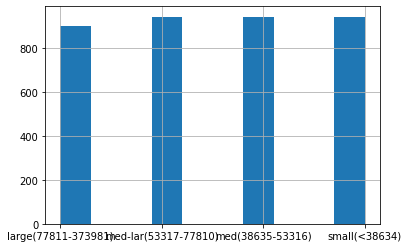

In [ ]:
res['largest_property_use_type_gross_floor_area_ft_cat'].hist()

In [ ]:
fig = px.histogram(res, x="largest_property_use_type_gross_floor_area_ft_cat")
fig.show()

In [ ]:
sc=StandardScaler()
standard=res.copy()
sub=standard.select_dtypes(include=[np.number])
standard[sub.columns[1:27]]=sc.fit_transform(standard[sub.columns[1:27]])
standard.head()

,score,largest_property_use_type_gross_floor_area_ft,year_built,number_of_buildings,occupancy,site_eui_kbtu_ft,weather_normalized_site_electricity_intensity_kwh_ft,green_power_offsite_kwh,egrid_output_emissions_rate_kgco2e_mbtu,percent_of_electricity_that_is_green_power,...,multifamily_housing_percent_that_can_be_cooled,multifamily_housing_percent_that_can_be_heated,water_use_all_water_sources_kgal,number_of_active_energy_meters_total,number_of_active_energy_meters_not_used_to_compute_metrics,number_of_active_it_meters,community_board,census_tract,longitude,latitude
0,100,3.843913,0.323406,-0.174131,0.272966,-1.942835,-0.650874,0.0,0.0,0.0,...,0.248457,-0.305184,7.358993e-01,-0.311777,-0.271246,0.0,-0.754851,-0.231184,-1.330767,-1.193173
1,68,0.623531,-0.140264,-0.174131,0.272966,-0.241110,-0.809331,0.0,0.0,0.0,...,-2.176564,-0.305184,2.187718e-16,0.128704,-0.271246,0.0,-0.397753,-0.644119,-0.862471,-0.075487
2,99,0.281299,-0.140264,-0.174131,0.272966,-1.178733,-0.809331,0.0,0.0,0.0,...,-2.176564,-0.930041,-6.464896e-02,0.789426,-0.271246,0.0,-0.040655,-0.631336,0.556964,-0.073944
3,49,-0.090765,-0.140264,-0.174131,0.272966,0.303807,-0.333961,0.0,0.0,0.0,...,-2.176564,-0.930041,4.514342e-01,0.128704,-0.271246,0.0,-1.111950,-0.646444,-0.434405,-1.042705
4,8,0.085053,-1.133841,-0.174131,0.272966,0.325117,0.405504,0.0,0.0,0.0,...,-2.176564,-0.930041,2.057685e-01,0.348945,-0.271246,0.0,-0.040655,-0.633805,0.456485,-0.395587


In [ ]:
sc=Normalizer()
normalized=res.copy()
sub=normalized.select_dtypes(include=[np.number])
normalized[sub.columns[1:27]]=sc.fit_transform(normalized[sub.columns[1:27]])
normalized.head()

,score,largest_property_use_type_gross_floor_area_ft,year_built,number_of_buildings,occupancy,site_eui_kbtu_ft,weather_normalized_site_electricity_intensity_kwh_ft,green_power_offsite_kwh,egrid_output_emissions_rate_kgco2e_mbtu,percent_of_electricity_that_is_green_power,...,multifamily_housing_percent_that_can_be_cooled,multifamily_housing_percent_that_can_be_heated,water_use_all_water_sources_kgal,number_of_active_energy_meters_total,number_of_active_energy_meters_not_used_to_compute_metrics,number_of_active_it_meters,community_board,census_tract,longitude,latitude
0,100,0.999258,0.006639,0.000003,0.000340,0.000081,0.000013,0.0,0.000270,0.0,...,0.000272,0.000306,0.032190,0.000024,0.0,0.0,0.000693,0.020052,-0.000251,0.000139
1,68,0.998055,0.018015,0.000009,0.000929,0.000741,0.000033,0.0,0.000738,0.0,...,0.000000,0.000836,0.059575,0.000084,0.0,0.0,0.001904,0.002015,-0.000686,0.000379
2,99,0.997291,0.022076,0.000011,0.001138,0.000558,0.000040,0.0,0.000905,0.0,...,0.000000,0.000910,0.069944,0.000137,0.0,0.0,0.002344,0.004472,-0.000841,0.000465
3,49,0.991784,0.029118,0.000015,0.001501,0.001466,0.000066,0.0,0.001193,0.0,...,0.000000,0.001201,0.124460,0.000135,0.0,0.0,0.003047,0.002777,-0.001109,0.000613
4,8,0.995159,0.024922,0.000013,0.001305,0.001284,0.000076,0.0,0.001037,0.0,...,0.000000,0.001044,0.094872,0.000130,0.0,0.0,0.002688,0.004684,-0.000964,0.000533


In [ ]:
X=res.drop('score', axis=1)
y=res['score']
X_n=normalized.drop('score', axis=1)
y_n=normalized['score']
X_r=standard.drop('score', axis=1)
y_r=standard['score']

In [ ]:
X.columns

Index(['largest_property_use_type_gross_floor_area_ft', 'year_built',
       'number_of_buildings', 'occupancy', 'site_eui_kbtu_ft',
       'weather_normalized_site_electricity_intensity_kwh_ft',
       'green_power_offsite_kwh', 'egrid_output_emissions_rate_kgco2e_mbtu',
       'percent_of_electricity_that_is_green_power',
       'multifamily_housing_total_number_of_residential_living_units_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_5_9_stories',
       'multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft',
       'multifamily_housing_percent_that_can_be_cooled',
       'multifamily_housing_percent_that_can_be_heated',
       'water_use_all_water_sources_kgal',
       'number_of_active_energy_meters_total',
       'number_of_active_ener

In [ ]:
from scipy import special
from scipy import stats

class Transformer():
    '''
    This class can be used for applying transformations and inverse transformations to the target variable.
    Supported transformations:
        -> square root
        -> log
        -> box cox
    '''
    def __init__(self):
        self._lambda = 0 # init lambda -> required for box cox inverse transformation
    
    def apply_transformation(self, data_in, transform_key):
        '''
        This function applies the transformation according to transformer_key to the provided input.
        
        Args:
            data_in (np.array): Input data to transform
            transform_key (string): Key which transformation to apply (can be: square_root, log, boxcox, no_transformation)
        
        Returns: 
            data_transformed (np.array): The transformed data
        '''
        if transform_key == "no_transformation":
            data_transformed = data_in
        elif transform_key == "square_root":
            data_transformed = np.sqrt(data_in)
        elif transform_key == "log":
            data_transformed = np.log(data_in)
        elif transform_key == "boxcox":
            data_transformed, self._lambda = stats.boxcox(data_in)
        else:
            raise ValueError(f"{transform_key} is an invalid option!")
        
        return data_transformed
    
    def apply_inverse_transformation(self, data_in, transform_key):
        '''
        This function applies the inverse transformation according to transformer_key to the provided input.
        
        Args:
            data_in (np.array): Input data to transform
            transform_key (string): Key which transformation to apply (can be: square_root, log, boxcox, no_transformation)
        
        Returns: 
            data_transformed (np.array): The transformed data
        '''
        if transform_key == "no_transformation":
            data_transformed = data_in
        elif transform_key == "square_root":
            data_transformed = data_in**2
        elif transform_key == "log":
            data_transformed = np.exp(data_in)
        elif transform_key == "boxcox":
            data_transformed = special.inv_boxcox(data_in, self._lambda)
        else:
            raise ValueError(f"{transform_key} is an invalid option!")
        
        return data_transformed

In [ ]:
# X=features.drop('score', axis=1)
# y=feat['score']
# X_n=normalized.drop('score', axis=1)
# y_n=normalized['score']
# X_r=standard.drop('score', axis=1)
# y_r=standard['score']

In [ ]:
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2416, 23)
(605, 23)
(756, 23)
(2416,)
(605,)
(756,)


In [ ]:
df_results#reg data

,R2-Score,MSE
no_transformation,0.913210,6.112661
square_root,0.912835,5.960813
log,0.909245,6.085281
boxcox,0.913778,6.007921


In [ ]:
# Standardized
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size = 0.2, random_state = 42)
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_train_r, y_train_r, test_size=0.20, random_state=1)


In [ ]:
df_results1#stand

,R2-Score,MSE
no_transformation,0.915288,6.006612
square_root,0.914018,5.964289
log,0.909174,6.069670
boxcox,0.912973,6.041849


In [ ]:
# normalized
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size = 0.2, random_state = 42)
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(X_train_n, y_train_n, test_size=0.20, random_state=1)


In [ ]:
# iterate over different transformations and train model plus get error
transformations_list = [
    "no_transformation",
    "square_root",
    "log",
    "boxcox"
]
results_dict = {}
for transformation in transformations_list:
    
    transformer = Transformer()
    
    y_train_transformed = transformer.apply_transformation(y_train_n, transformation)
    
    # create linear regression model and train
    reg = RandomForestRegressor().fit(X_train_n, y_train_transformed)
    
    # create predictions on test set
    preds = reg.predict(X_val_n)
    
    # transform back
    preds = transformer.apply_inverse_transformation(preds, transformation)
    
    # get mse and r2
    r2 = r2_score(y_val_n, preds)
    mse = mean_absolute_error(y_val_n, preds)
    
    # store in results dict
    results_dict[transformation] = [r2, mse]

df_results1 = pd.DataFrame.from_dict(results_dict, orient="index", columns=["R2-Score", "MSE"])

In [ ]:
df_results1


,R2-Score,MSE
no_transformation,0.878556,7.667669
square_root,0.877086,7.610512
log,0.867279,7.749680
boxcox,0.879157,7.589673


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 58.00
Baseline Performance on the test set: MAE = 22.0795


In [ ]:
nam=['Ada Boost','Decision Tree','Gradient Boost', 'SVM', 'Random Forest']



In [ ]:
def ada(X_train, X_val, y_train, y_val, X_test, y_test):
    
    # fit the regressor with val data
    regressor = AdaBoostRegressor() 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
def ada_h(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 100}
    
    # fit the regressor with val data
    regressor = AdaBoostRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    y_test_pred=regressor.predict(X_test)
    
   # print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    print('MAE test: %.3f'  % mean_absolute_error(y_test, y_test_pred))
    
    #print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = regressor.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(features.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
ada(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 11.182, val: 11.089
R^2 train: 0.817, val: 0.807


In [ ]:
#res man
ada(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 13.765, val: 13.749
R^2 train: 0.679, val: 0.660


In [ ]:
ada(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 17.907, val: 17.461
R^2 train: 0.531, val: 0.525


In [ ]:
#res man
ada(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 18.809, val: 18.631
R^2 train: 0.390, val: 0.369


In [ ]:
ada(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 11.286, val: 11.060
R^2 train: 0.814, val: 0.808


In [ ]:
#res man
ada(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 13.521, val: 13.634
R^2 train: 0.685, val: 0.660


MAE test: 9.636
R^2 test: 0.831


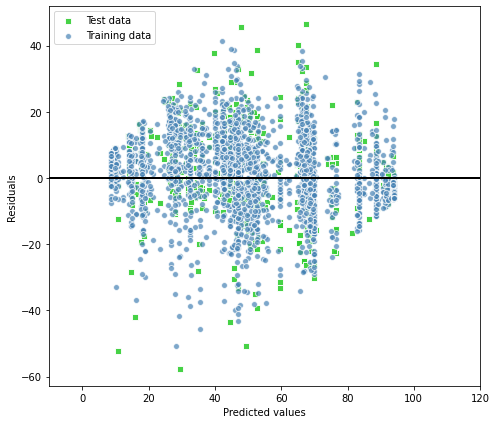

In [ ]:
ada_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [ ]:
def dtree(X_train, X_val, y_train, y_val, X_test, y_test):
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor() 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
def dtree_h(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'max_depth': 11, 'max_features': None, 'max_leaf_nodes': 60, 'min_samples_leaf': 2, 'splitter': 'random'}
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    y_test_pred=regressor.predict(X_test)
    
   # print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    print('MAE test: %.3f'  % mean_absolute_error(y_test, y_test_pred))
    
    #print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = regressor.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(features.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
dtree(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 0.000, val: 9.582
R^2 train: 1.000, val: 0.778


In [ ]:
dtree(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 0.000, val: 11.598
R^2 train: 1.000, val: 0.668


In [ ]:
dtree(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 0.000, val: 9.790
R^2 train: 1.000, val: 0.760


MAE test: 9.074
R^2 test: 0.834


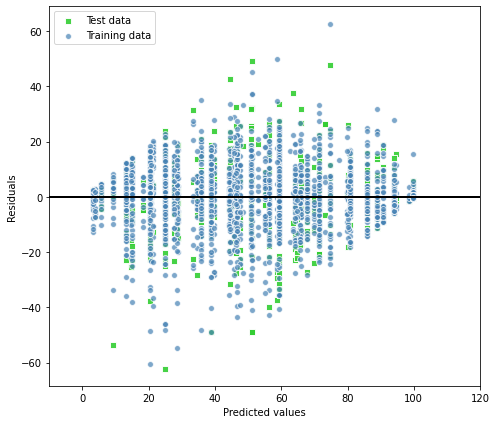

In [ ]:
dtree_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [ ]:
from matplotlib import pyplot

In [ ]:
def gbr(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg =  xgboost.XGBRegressor()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    print(reg.get_params())
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
def gbr_h(X_train, X_val, y_train, y_val, X_test, y_test ):

    #params = {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.5}
    #params = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
    #params = {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5} best
    params= {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.9}
    #val
    reg = xgboost.XGBRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    y_test_pred=reg.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    
    importance = reg.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# check xgboost version
import xgboost

In [ ]:
gbr(X_train, X_val, y_train, y_val, X_test, y_test )

[11:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
MAE train: 5.549, val: 6.331
R^2 train: 0.934, val: 0.917


In [ ]:
gbr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

[11:35:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
MAE train: 7.468, val: 8.691
R^2 train: 0.899, val: 0.862


In [ ]:
gbr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

[11:35:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
MAE train: 5.549, val: 6.331
R^2 train: 0.934, val: 0.917


In [ ]:
#res man
gbr(X_train, X_val, y_train, y_val, X_test, y_test )

[22:44:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
MAE train: 8.001, val: 9.029
R^2 train: 0.849, val: 0.798


In [ ]:
#res man
gbr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

[22:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
MAE train: 10.916, val: 12.302
R^2 train: 0.756, val: 0.680


In [ ]:
#res man
gbr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

[22:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
MAE train: 8.001, val: 9.029
R^2 train: 0.849, val: 0.798


In [ ]:
gbr_h(X_train, X_val, y_train, y_val, X_test, y_test )

[23:40:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE test: 7.167
R^2 test: 0.848
Feature: 0, Score: 0.01254
Feature: 1, Score: 0.00858
Feature: 2, Score: 0.00756
Feature: 3, Score: 0.01346
Feature: 4, Score: 0.11037
Feature: 5, Score: 0.07959
Feature: 6, Score: 0.01245
Feature: 7, Score: 0.01681
Feature: 8, Score: 0.38789
Feature: 9, Score: 0.02994
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.08833
Feature: 14, Score: 0.03423
Feature: 15, Score: 0.02841
Feature: 16, Score: 0.02222
Feature: 17, Score: 0.03924
Feature: 18, Score: 0.00747
Feature: 19, Score: 0.01000
Feature: 20, Score: 0.01389
Feature: 21, Score: 0.01535
Feature: 22, Score: 0.00734
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00881
Feature: 25, Score: 0.01742
Feature: 26, Score: 0.01270
Feature: 27, Score: 0.01538


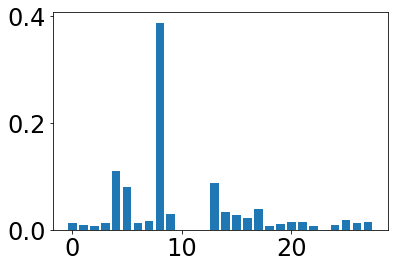

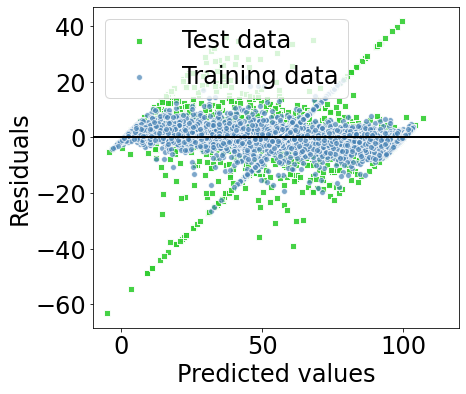

In [ ]:
#res
gbr_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [ ]:
X.columns

Index(['largest_property_use_type_gross_floor_area_ft', 'year_built',
       'number_of_buildings', 'occupancy',
       'weather_normalized_site_electricity_intensity_kwh_ft',
       'weather_normalized_site_natural_gas_intensity_therms_ft',
       'weather_normalized_site_electricity_kwh',
       'direct_ghg_emissions_metric_tons_co2e',
       'total_ghg_emissions_intensity_kgco2e_ft',
       'direct_ghg_emissions_intensity_kgco2e_ft',
       'egrid_output_emissions_rate_kgco2e_mbtu',
       'avoided_emissions_offsite_green_power_metric_tons_co2e',
       'percent_of_electricity_that_is_green_power',
       'multifamily_housing_number_of_bedrooms_density_number_per_1_000_sq_ft',
       'multifamily_housing_total_number_of_residential_living_units_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_5_9

In [ ]:
from sklearn.svm import SVR

In [ ]:
def svr(X_train, X_val, y_train, y_val, X_test, y_test ):
    params = {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
    #val
    reg = SVR(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    print(reg.get_params())
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))
    

In [ ]:
def svr_h(X_train, X_val, y_train, y_val, X_test, y_test ):

    params = {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
    
    #val
    reg = SVR(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_test)
    #test
    y_test_pred=reg.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
svr(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 0.100, val: 24.783
R^2 train: 1.000, val: 0.017


In [ ]:
svr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 23.026, val: 22.301
R^2 train: 0.110, val: 0.096


In [ ]:
svr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 0.184, val: 17.572
R^2 train: 0.998, val: 0.423


In [ ]:
#
svr(X_train, X_val, y_train, y_val, X_test, y_test )

{'C': 100, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
MAE train: 0.100, val: 21.860
R^2 train: 1.000, val: 0.002


In [ ]:
#
svr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 19.555, val: 18.683
R^2 train: 0.260, val: 0.280


In [ ]:
#
svr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 0.100, val: 17.369
R^2 train: 1.000, val: 0.307


MAE test: 7.506
R^2 test: 0.892


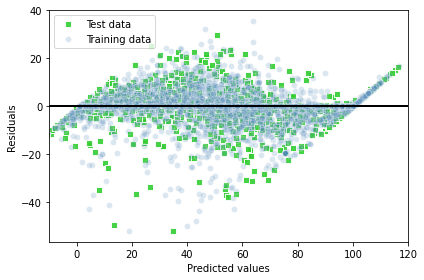

In [ ]:
svr_h(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE test: 8.115
R^2 test: 0.792


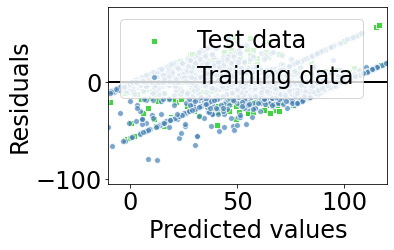

In [ ]:
svr_h(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

In [ ]:
def rf(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg = RandomForestRegressor()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
from matplotlib import pyplot

In [ ]:
def rf_h(X_train, X_val, y_train, y_val, X_test, y_test ):
    
    params = {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 110, 'max_features': 'auto', 'n_estimators': 200}
    #'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500
    #
    #val
    reg = RandomForestRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    y_test_pred=reg.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

    importance = reg.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.2,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
rf(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 2.493, val: 6.021
R^2 train: 0.985, val: 0.915


In [ ]:
rf(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 3.140, val: 7.763
R^2 train: 0.979, val: 0.877


In [ ]:
rf(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 2.497, val: 6.038
R^2 train: 0.985, val: 0.915


In [ ]:
#
rf(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 3.129, val: 8.205
R^2 train: 0.974, val: 0.819


In [ ]:
#
rf(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 4.518, val: 12.119
R^2 train: 0.955, val: 0.666


In [ ]:
#
rf(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 3.090, val: 8.126
R^2 train: 0.975, val: 0.821


MAE test: 6.864
R^2 test: 0.893
Feature: 0, Score: 0.01005
Feature: 1, Score: 0.00994
Feature: 2, Score: 0.00053
Feature: 3, Score: 0.00265
Feature: 4, Score: 0.81964
Feature: 5, Score: 0.05488
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.01150
Feature: 10, Score: 0.00400
Feature: 11, Score: 0.00692
Feature: 12, Score: 0.03634
Feature: 13, Score: 0.00250
Feature: 14, Score: 0.00161
Feature: 15, Score: 0.00715
Feature: 16, Score: 0.00994
Feature: 17, Score: 0.00084
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00293
Feature: 20, Score: 0.00546
Feature: 21, Score: 0.00684
Feature: 22, Score: 0.00628


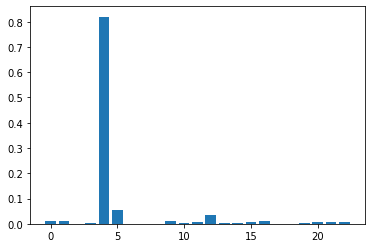

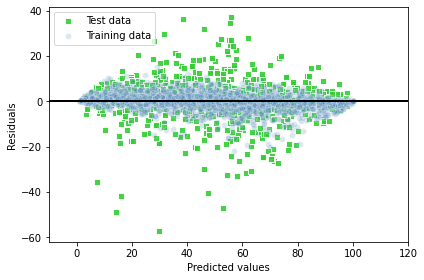

In [ ]:
rf_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [ ]:
X.columns

Index(['largest_property_use_type_gross_floor_area_ft', 'year_built',
       'number_of_buildings', 'occupancy', 'site_eui_kbtu_ft',
       'weather_normalized_site_electricity_intensity_kwh_ft',
       'green_power_offsite_kwh', 'egrid_output_emissions_rate_kgco2e_mbtu',
       'percent_of_electricity_that_is_green_power',
       'multifamily_housing_total_number_of_residential_living_units_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_5_9_stories',
       'multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft',
       'multifamily_housing_percent_that_can_be_cooled',
       'multifamily_housing_percent_that_can_be_heated',
       'water_use_all_water_sources_kgal',
       'number_of_active_energy_meters_total',
       'number_of_active_ener

MAE test: 8.229
R^2 test: 0.821
Feature: 0, Score: 0.01976
Feature: 1, Score: 0.01052
Feature: 2, Score: 0.00092
Feature: 3, Score: 0.00341
Feature: 4, Score: 0.15371
Feature: 5, Score: 0.04027
Feature: 6, Score: 0.01093
Feature: 7, Score: 0.01322
Feature: 8, Score: 0.48604
Feature: 9, Score: 0.01725
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.12784
Feature: 14, Score: 0.03024
Feature: 15, Score: 0.00669
Feature: 16, Score: 0.00898
Feature: 17, Score: 0.00644
Feature: 18, Score: 0.00333
Feature: 19, Score: 0.00232
Feature: 20, Score: 0.01171
Feature: 21, Score: 0.00973
Feature: 22, Score: 0.00098
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00338
Feature: 25, Score: 0.01172
Feature: 26, Score: 0.01064
Feature: 27, Score: 0.00995


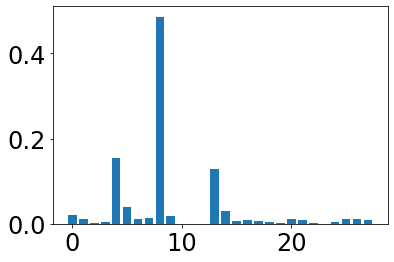

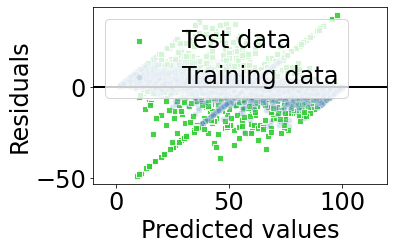

In [ ]:
#
rf_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [ ]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


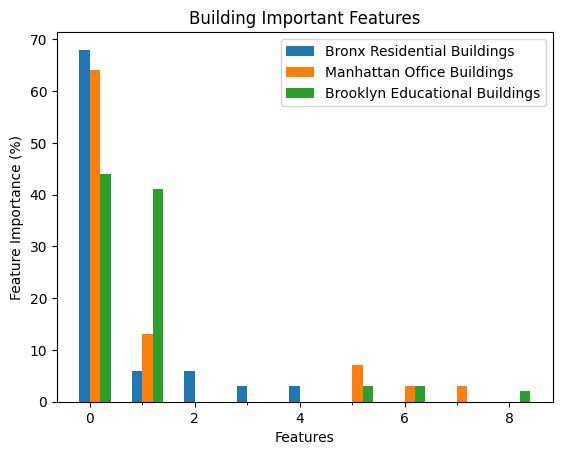

In [ ]:
fea=['Site EUI','Weather Norm Site Electricity Intensity','Number of Residential Units(mid rise building)',
     'Number of Residential Units(high rise building)','Number of Active Energy Meters','Gross Floor Area',
 'Year Built',
 'Water Use(all water sources)','Latitude']
resi=[68,6,6,3,3,0,0,0,0]
offi=[64,13,0,0,0,7,3,3,0]
educ=[44,41,0,0,0,3,3,0,2]
names=['Bronx Residential Buildings','Manhattan Office Buildings', 'Brooklyn Educational Buildings' ]
x = np.arange(len(fea))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()

#plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, resi, width, label='Bronx Residential Buildings')
rects2 = ax.bar(x + width/2, offi, width, label='Manhattan Office Buildings')
rects3 = ax.bar(x + 3*width/2, educ, width, label='Brooklyn Educational Buildings')

y_pos = np.arange(len(fea))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Features')
ax.set_ylabel('Feature Importance (%)')
ax.set_title('Building Important Features')
ax.set_xticks(x, fea)
ax.legend(loc='upper right')

# ax.barh(fea, num, )
# ax.set_yticks(y_pos, fea)
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Feature Importance (%)')
# ax.set_ylabel('Features ')
# ax.set_title('Bronx Residential Buildings Important Features')
# for i, v in enumerate(num):
    # plt.text(v+0.2, i, str(round(v, 2)), va="center")
plt.show()


In [ ]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

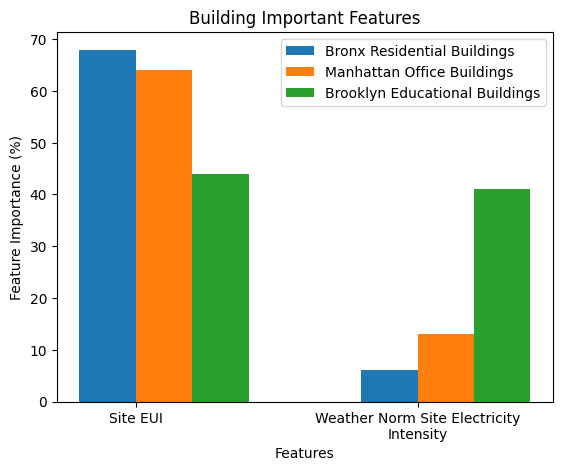

In [ ]:
fea=['Site EUI','Weather Norm Site Electricity Intensity']
resi=[68,6]
offi=[64,13]
educ=[44,41]
names=['Bronx Residential Buildings','Manhattan Office Buildings', 'Brooklyn Educational Buildings' ]
x = np.arange(len(fea))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()

#plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, resi, width, label='Bronx Residential Buildings')
rects2 = ax.bar(x + width/2, offi, width, label='Manhattan Office Buildings')
rects3 = ax.bar(x + 3*width/2, educ, width, label='Brooklyn Educational Buildings')

y_pos = np.arange(len(fea))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Features')
ax.set_ylabel('Feature Importance (%)')
ax.set_title('Building Important Features')
#ax.set_xticks(x, fea)
ax.set_xticks(x)
ax.set_xticklabels(fea)
ax.legend(loc='upper right')
wrap_labels(ax, 30)
ax.figure
# ax.barh(fea, num, )
# ax.set_yticks(y_pos, fea)
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Feature Importance (%)')
# ax.set_ylabel(Features ')
# ax.set_title('Bronx Residential Buildings Important Features')
# for i, v in enumerate(num):
    # plt.text(v+0.2, i, str(round(v, 2)), va="center")
plt.show()


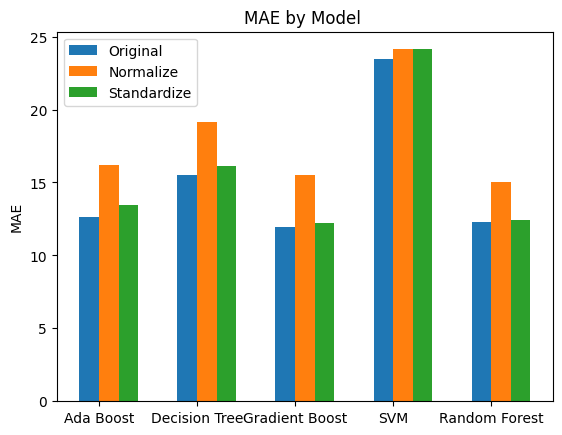

<Figure size 5000x1000 with 0 Axes>

In [ ]:
#reg
same=[12.65,15.49,11.94,23.48,12.27]
norm=[16.23,19.16,15.48,24.13,15.01]
stand=[13.45,16.13,12.21,24.12,12.41]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')
ax.set_title('MAE by Model ')
ax.set_xticks(x)
ax.set_xticklabels(nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

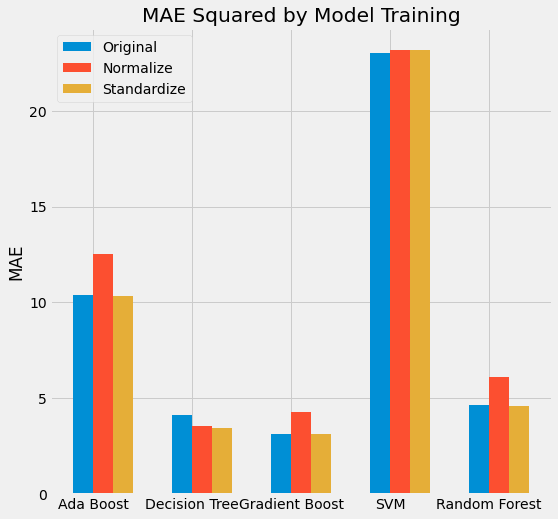

<Figure size 3600x720 with 0 Axes>

In [ ]:
#r2
same=[10.37, 4.11,3.12,23.00,4.66]
norm=[12.50,3.56,4.27,23.16,6.13]
stand=[10.33,3.43,3.12,23.14,4.61]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')
ax.set_title('MAE Squared by Model Training')
ax.set_xticks(x, nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

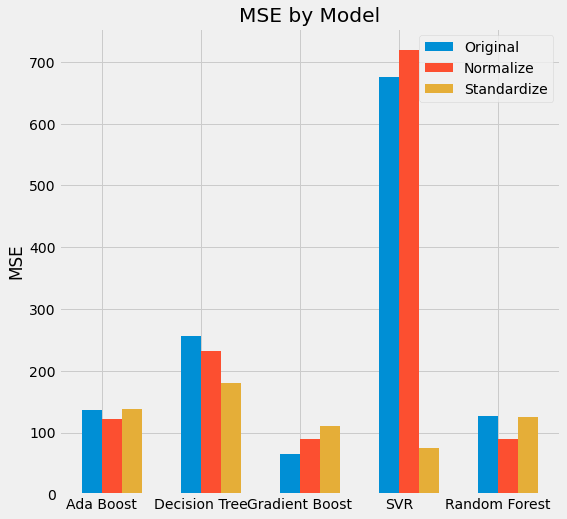

<Figure size 3600x720 with 0 Axes>

In [ ]:
#hyper
same=[136.76,256.92,64.66, 675.61,125.99]
norm=[122.33,232.58,90.25,719.21,89.53]
stand=[137.70,179.62,110.49,74.42,125.71]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by Model')
ax.set_xticks(x, nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

HYPERPARAMETER TUNING

In [ ]:
import xgboost

In [ ]:
from sklearn.metrics import make_scorer
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [ ]:
parameters = {'learning_rate': [0.1,0.2,0.3,0.4],
                  'subsample'    : [1,.9,.7, .5, .2, .1],
                  'n_estimators' : [50,100,200,500,1000, 1500],
                  'max_depth'    : [1,2,3,4,6,8,10],
               
                 }

#{ 'learning_rate': 0.1, 'max_depth': 3,  'n_estimators': 100, 'n_jobs': 1,'subsample': 1}
#'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1
GBR = xgboost.XGBRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

[23:39:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(max_depth=6, n_estimators=200, subsample=0.9)

 The best score across ALL searched params:
 0.8243349783373468

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.9}


In [ ]:
parameters = {
   'n_estimators': [5,20,50, 100, 200, 500,1000],
   'max_features': ['auto', 'sqrt', 'log2'],
   'criterion' :['squared_error', 'absolute_error'],
   'bootstrap' : [True, False],
   "max_depth" : [None,1,3,5,7,9,11,12],
   'min_samples_split' : [1,2,3,5,6,8,10], # minimum sample number to split a node
   "min_samples_leaf":[1,2,3,5,6,8,10]
  
}

#{'criterion': 'squared_error',  'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100,  }

GBR = RandomForestRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}
GBR = DecisionTreeRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1,scoring=scorer)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=11, max_leaf_nodes=60, min_samples_leaf=2,
                      splitter='random')

 The best score across ALL searched params:
 -8.470366707606392

 The best parameters across ALL searched params:
 {'max_depth': 11, 'max_features': None, 'max_leaf_nodes': 60, 'min_samples_leaf': 2, 'splitter': 'random'}


In [ ]:
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
#{'C': 100, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf', }

GBR = SVR()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_r, y_train_r)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVR(C=1000, gamma=0.01)

 The best score across ALL searched params:
 0.7628474172420205

 The best parameters across ALL searched params:
 {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
parameters = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }
GBR = AdaBoostRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1,scoring=scorer)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 AdaBoostRegressor(learning_rate=0.05, n_estimators=100)

 The best score across ALL searched params:
 -9.259703768972692

 The best parameters across ALL searched params:
 {'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 100}
